In [21]:
%pip install array-api-strict

Note: you may need to restart the kernel to use updated packages.


In [22]:
# import numpy as np
import array_api_strict as np
import matplotlib.pyplot as plt
def render(imgsize):
    # Generate num samples
    y_vals = np.linspace(1, -1, imgsize * 2)
    x_vals = np.linspace(-1, 1, imgsize * 2)

    # Manually broadcast y_vals and x_vals to form a grid
    y = y_vals[:, np.newaxis]
    x = x_vals[np.newaxis, :]
    y = np.asarray(y, dtype=np.complex64)
    x = np.asarray(x, dtype=np.complex64)
    z = x + y * 1j
    img = iterate_vectorized(z)

    # Normalize the image data to be between 0 and 1
    if np.any(np.isnan(img)):
        print("NaN values detected in img, which will affect normalization.")
        img = np.where(np.isnan(img), 0, img)  # Replace NaN with 0
        img = np.where(np.isinf(img), np.finfo(img.dtype).max, img)  # Replace inf with max
        img = np.where(img == -np.inf, np.finfo(img.dtype).min, img)  # Replace -inf with min

    if np.max(img) != np.min(img):
        img = (img - np.min(img)) / (np.max(img) - np.min(img))
    else:
        img = np.zeros(img.shape)

    colormaps = ['hot', 'plasma', 'inferno', 'twilight']
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    for ax, cmap in zip(axes.flatten(), colormaps):
        ax.imshow(img, cmap=cmap)
        ax.axis("off")
        ax.set_title(cmap)

    plt.tight_layout()
    plt.show()

# Define the complex function and its derivative manually.
def f(z):
    return z**3 - 1

def df(z):
    return 3*z**2

# Vectorized iterate function using NumPy operations.
def iterate_vectorized(z):
    max_iterations = 50 
    tolerance = 1e-4 
    iterations = np.zeros(z.shape, dtype=np.float32)  # Number of iterations for convergence
    for _ in range(max_iterations):
        dz = df(z)
        z_new = z - f(z) / dz  # Newton's update formula: z_new = z - f(z) / f'(z)
        converged = np.abs(z_new - z) < tolerance
        z[~converged] = z_new[~converged]  # Update z only where it has not yet converged
        iterations[~converged] += 1  # Increment iteration count where not yet converged
        if np.all(converged):
            break  # Exit loop if all values have converged

    return iterations  # Num iterations for each element in z

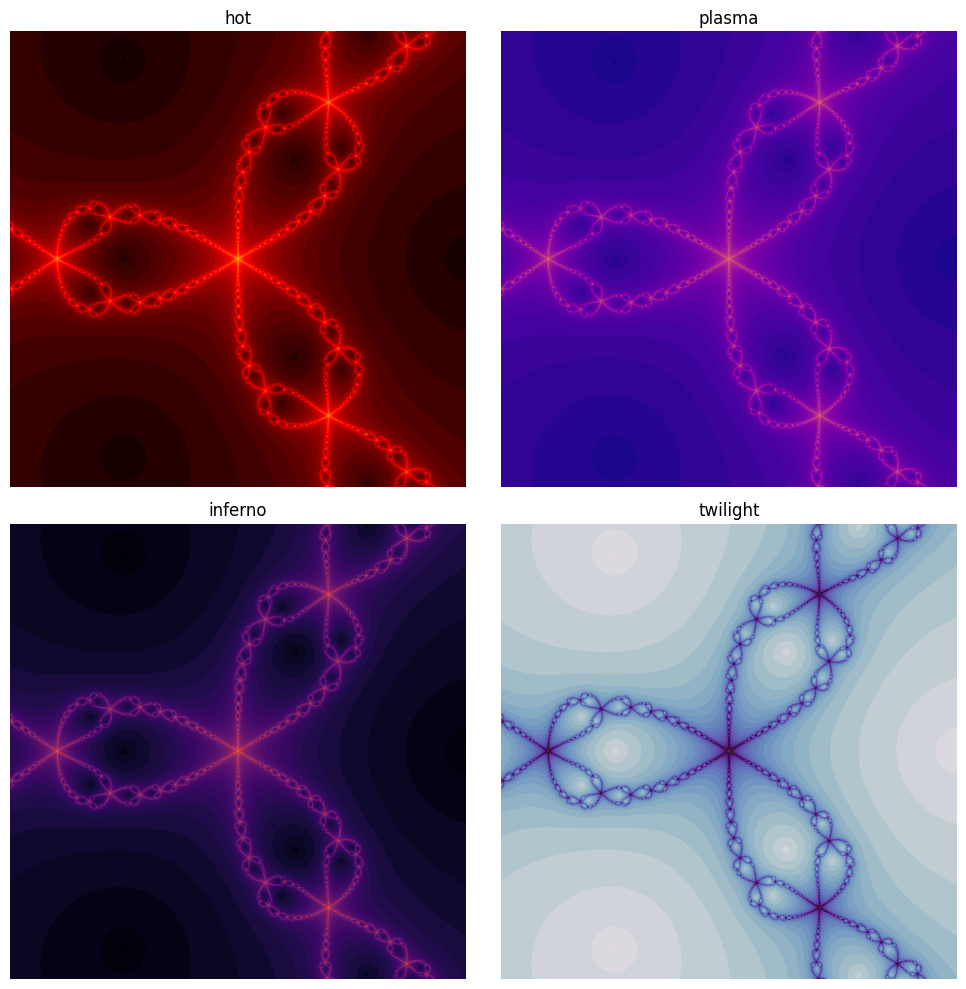

In [23]:
render(imgsize=600)

In [24]:
import matplotlib.pyplot as plt

def find_roots(degree):
    """Find the roots of unity for a given degree."""
    return np.array([np.exp(2j * np.pi * k / degree) for k in range(degree)])

def f(z, degree):
    return z**degree - 1

def df(z, degree):
    return degree*z**(degree-1)

def iterate(z, roots):
    degree = len(roots)
    for iteration in range(50):  # Max iterations
        dz = df(z, degree)
        with np.errstate(all='ignore'):
            z_new = z - f(z, degree) / dz
            if np.all(np.abs(z_new - z) < 1e-4):
                break
            z = z_new
    # Measure distance to each root and find the closest one
    distances = np.abs(z - roots[:, np.newaxis])
    closest_root = np.argmin(distances, axis=0)
    # Check convergence to a root
    # converged = np.min(distances, axis=0) < 1e-4
    #assert np.all(converged), "Some points did not converge to a root"
    return closest_root

def render(imgsize, degree):
    roots = find_roots(degree)
    y, x = np.ogrid[1 : -1 : imgsize * 2j, -1 : 1 : imgsize * 2j]
    z = x + y * 1j

    vectorized_iterate = np.vectorize(iterate, excluded=['roots'])
    img = vectorized_iterate(z, roots=roots)

    # Simple color mapping for visualization
    img_color = np.select([img == 0, img == 1, img == 2], [0.5, 0, 1], default=np.nan)

    plt.imshow(img_color, cmap='gray')
    plt.axis("off")
    plt.show()

# Example usage for cubic roots
render(imgsize=100, degree=3)


AttributeError: module 'array_api_strict' has no attribute 'array'

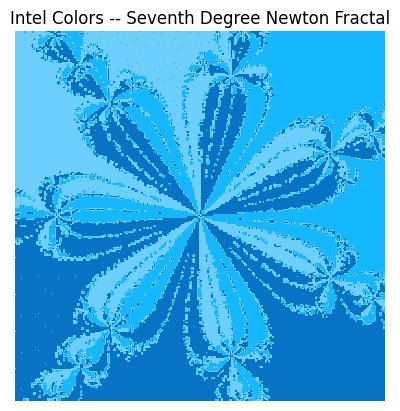

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def find_roots(degree):
    """Find the roots of unity for a given degree."""
    return np.array([np.exp(2j * np.pi * k / degree) for k in range(degree)])

def f(z, degree):
    return z**degree - 1

def df(z, degree):
    return degree*z**(degree-1)

def iterate(z, roots):
    degree = len(roots)
    for iteration in range(50):  # Max iterations
        dz = df(z, degree)
        with np.errstate(all='ignore'):
            z_new = z - f(z, degree) / dz
            if np.all(np.abs(z_new - z) < 1e-4):
                break
            z = z_new
    # Measure distance to each root and find the closest one
    distances = np.abs(z - roots[:, np.newaxis])
    closest_root = np.argmin(distances, axis=0)
    # Check convergence to a root
    # converged = np.min(distances, axis=0) < 1e-4
    #assert np.all(converged), "Some points did not converge to a root"
    return closest_root

def render(imgsize, degree):
    roots = find_roots(degree)
    y, x = np.ogrid[1 : -1 : imgsize * 2j, -1 : 1 : imgsize * 2j]
    z = x + y * 1j

    vectorized_iterate = np.vectorize(iterate, excluded=['roots'])
    img = vectorized_iterate(z, roots=roots)

    # INTEL color mapping for visualization
    hex_colors = ['#15b8fc', '#6ccffc', '#0773c4']
    cmap = ListedColormap(hex_colors)

    plt.imshow(img, cmap=cmap)
    plt.title("Intel Colors -- Seventh Degree Newton Fractal")
    plt.axis("off")
    plt.show()

# Example usage for cubic roots
render(imgsize=100, degree=7)
